In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


In [80]:
# dataset load
data = pd.read_csv("/home/dataset/complete.csv")
data_only_pm25 = pd.DataFrame(data.loc[:, ["PM-2.5", "일시"]])
data_only_pm25["일시"] = pd.to_datetime(data_only_pm25["일시"])
data_only_pm25.index = data_only_pm25["일시"]
del data_only_pm25["일시"]
data_only_pm25.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2029 entries, 2018-02-01 to 2023-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM-2.5  2029 non-null   float64
dtypes: float64(1)
memory usage: 31.7 KB


In [131]:
data = data_only_pm25.iloc[50:, :]

In [132]:
data

,PM-2.5
일시,
2018-04-01,27.0
2018-04-02,21.0
2018-04-03,16.0
2018-04-04,4.0
2018-04-05,3.0
...,...
2023-08-27,17.0
2023-08-28,7.0
2023-08-29,7.0


<Figure size 640x480 with 0 Axes>

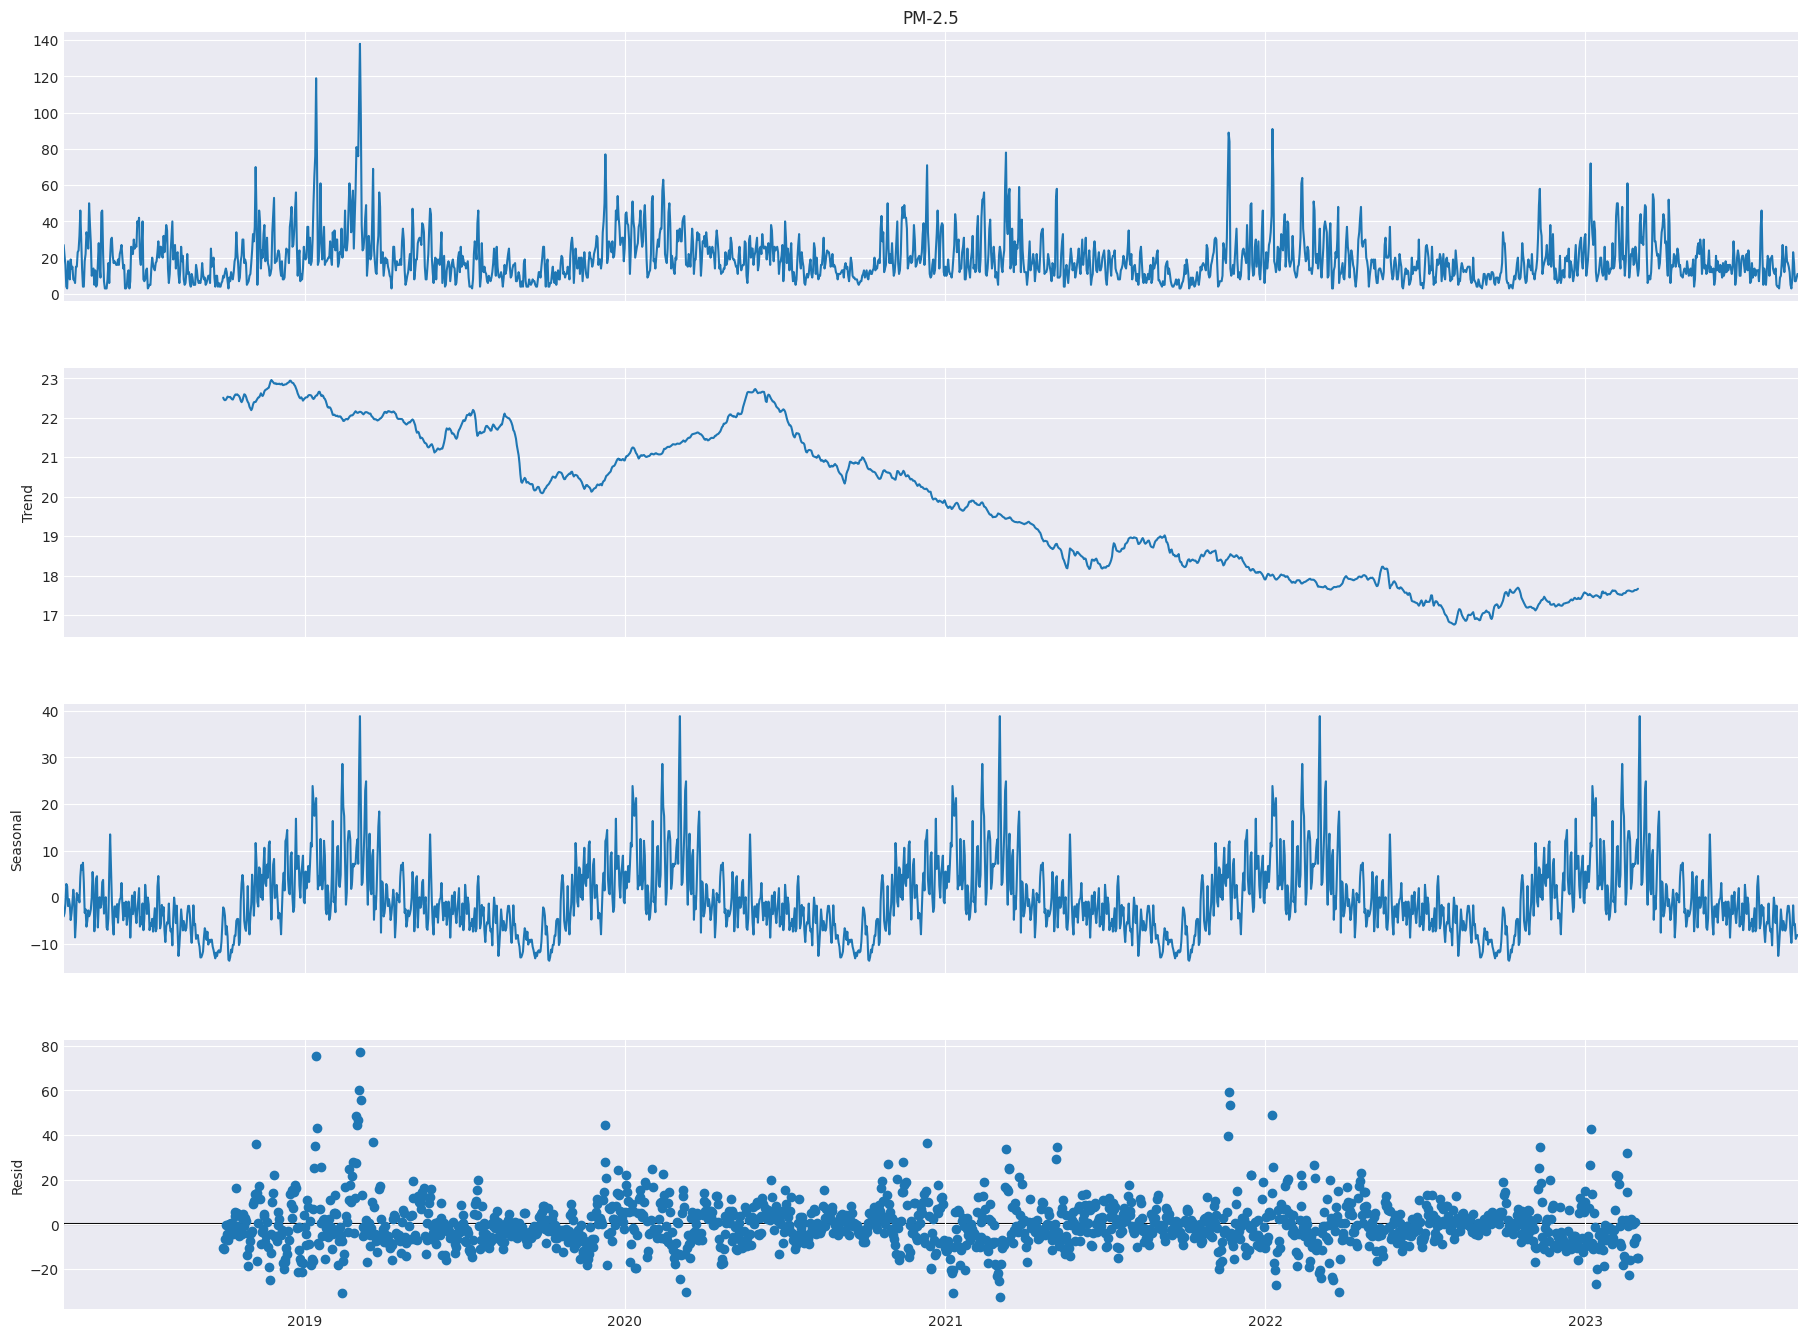

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["PM-2.5"], model="additive", period=365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

In [92]:
data_diff = data.diff().iloc[1:, :]

/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


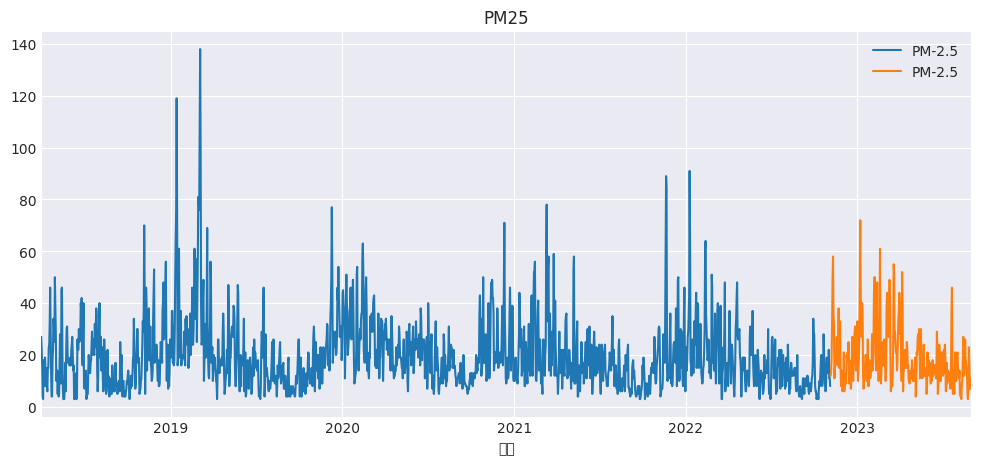

In [134]:
tst_size = 300
trn, tst = data[:-tst_size], data[-tst_size:]

ax = trn.plot(title="PM25", label='trn', figsize=(12,5))
ax = tst.plot(label='tst', ax=ax)

plt.legend()
plt.show()

ADF Statistic: -6.416259649452621
p-value: 1.838099903306308e-08
Critical Values:
	1%: -3.434283579780684
	5%: -2.863277451883613
	10%: -2.5676949772294817


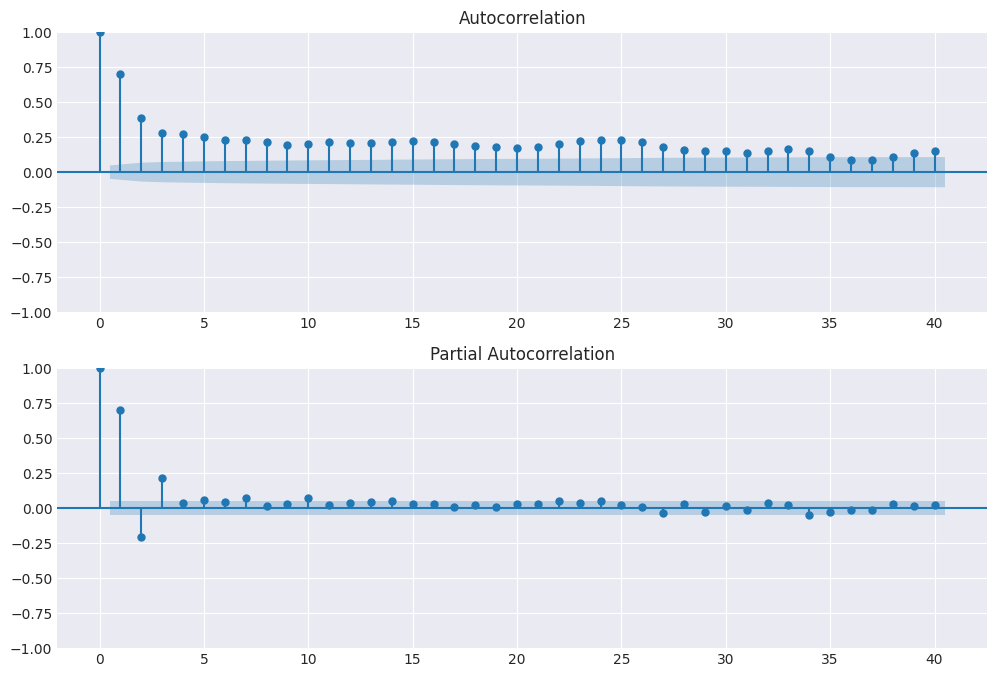

In [135]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(trn.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(trn.values.squeeze(), lags=40, ax=ax2)

adf = adfuller(trn)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))
  
# p-value: 7.903929799841826e-10 -> stationary process

ADF Statistic: -10.264485446396113
p-value: 4.1535513224462356e-18
Critical Values:
	1%: -3.4392057325732104
	5%: -2.8654483492874236
	10%: -2.5688512291811225


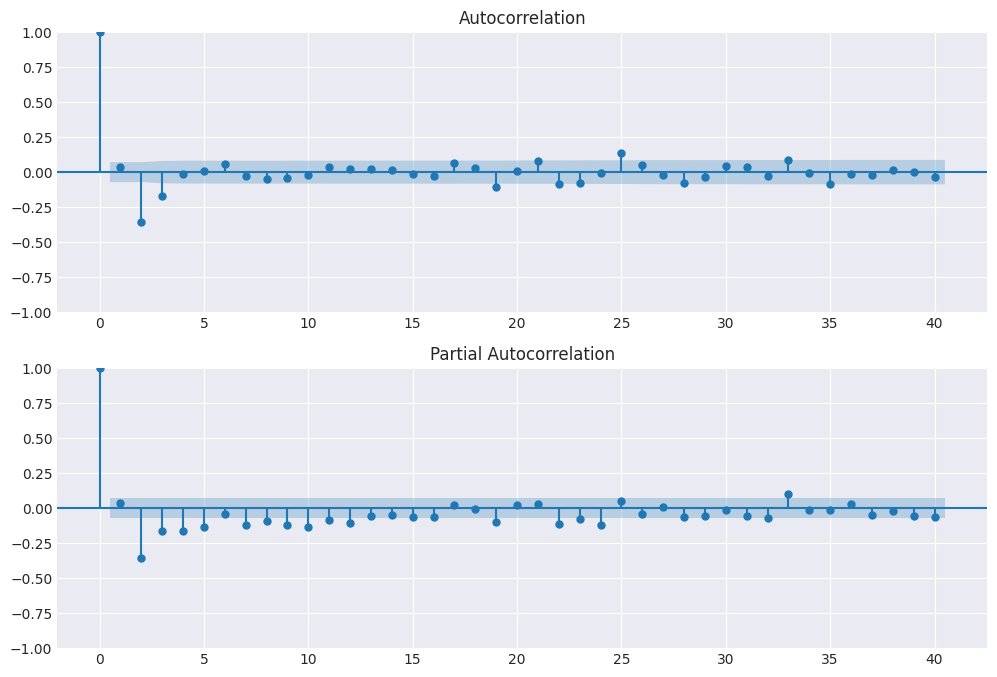

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
data_diff = data.diff(1).iloc[1:,:]
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_diff.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_diff.squeeze(), lags=40, ax=ax2)

adf = adfuller(data_diff)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))
  
# p-value: 7.903929799841826e-10 -> stationary process

In [103]:
def mape(y_pred, y_true):
  return (np.abs(y_pred - y_true)/y_true).mean() * 100

def mae(y_pred, y_true):
  return np.abs(y_pred - y_true).mean()

In [128]:
from statsmodels.tsa.arima.model import ARIMA

trn, tst = data[:-tst_size]["PM-2.5"], data[-tst_size:]["PM-2.5"]
model = ARIMA(data, order=(18,2,3)).fit() # AR(9)

/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/estsoft/miniconda3/envs/wassup/lib/p

In [ ]:
from statsmodels.tsa.

In [129]:
tst

일시
2022-11-05    12.0
2022-11-06    14.0
2022-11-07    19.0
2022-11-08    31.0
2022-11-09    49.0
              ... 
2023-08-27    17.0
2023-08-28     7.0
2023-08-29     7.0
2023-08-30     9.0
2023-08-31    11.0
Name: PM-2.5, Length: 300, dtype: float64

2022-11-05     8.958159
2022-11-06    11.515606
2022-11-07    14.045455
2022-11-08    13.207507
2022-11-09    13.091552
                ...    
2023-08-27    11.612388
2023-08-28    11.587982
2023-08-29    11.596090
2023-08-30    11.593302
2023-08-31    11.575164
Freq: D, Name: predicted_mean, Length: 300, dtype: float64


/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/wassup/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


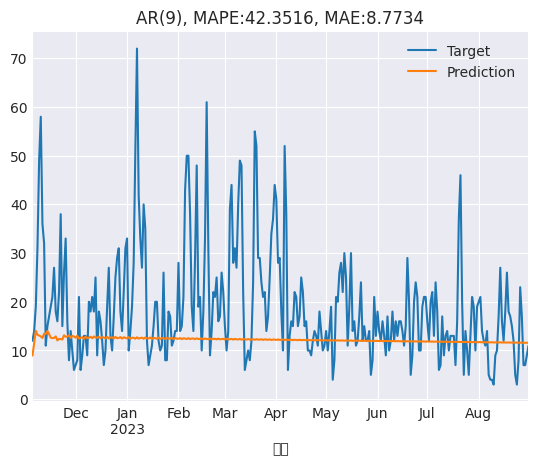

In [130]:
res_dict = {}
from datetime import datetime
start_date = datetime(2022,11,5)
end_date = datetime(2023,8,31)
# start_date = pd.Timestamp("2023-02-13")
# end_date = pd.Timestamp("2023-08-31")

prd = model.predict(start_date, end_date, dynamic=True)
print(prd)
plt.title(f"AR(9), MAPE:{mape(prd, tst):.4f}, MAE:{mae(prd, tst):.4f}")
tst.plot(label="Target")
prd.plot(label=f"Prediction")
plt.legend()
plt.show()

res_dict.update({'AR(9)': {'MAPE':mape(prd,tst), 'MAE':mae(prd,tst)}})